# 03_01.Support Vector Machine(예측)

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 런타임 다시 시작

In [ ]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

## 3.데이터 전처리
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

## 5.모델구축
from sklearn.svm import SVR # 서포트 벡터 머신(SVM)(예측)
# from sklearn.svm import SVC # 서포트 벡터 머신(SVM)(분류)

## 6.모델검정
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 7.최적화
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝

## 2.데이터 불러오기

### 2.1 구글 드라이브와 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.2 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
housing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/주택가격.csv', encoding="cp949")
housing_df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,2,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,3,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,4,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,5,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


### 2.3 자료구조 살펴보기

In [ ]:
housing_df.shape

In [ ]:
housing_df.info()

In [ ]:
housing_df.columns

## 3.데이터 전처리

### 3.1 필요없는 변수 제거

In [ ]:
housing_df = housing_df.drop (['id'], axis=1)
housing_df.head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


### 3.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
housing_df['주거유형'] = housing_df['주거유형'].replace ([1,2,3,4,5], ['단독주택','2가구변경','듀플렉스','타운젠트바깥쪽','타운젠트안쪽'])
housing_df['판매유형'] = housing_df['판매유형'].replace ([1,2], ['보증증서','법원관리증서'])
housing_df['판매조건'] = housing_df['판매조건'].replace ([1,2], ['정상판매','압류및공매도'])
housing_df.head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,단독주택,보증증서,정상판매
1,181500,9600,6,8,1976,1976,1262,460,1262,0,단독주택,보증증서,정상판매
2,223500,11250,7,5,2001,2002,920,608,920,866,단독주택,보증증서,정상판매
3,140000,9550,7,5,1915,1970,756,642,961,756,단독주택,보증증서,압류및공매도
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,단독주택,보증증서,정상판매


## 4.데이터 탐색

### 4.1 EDA 데이터 탐색

In [ ]:
# 수치형 변수
housing_df.describe().round(2).T

In [ ]:
# 범주형 변수
# lecture_df.columns
categorical_features=['주거유형', '판매유형', '판매조건']

for col in categorical_features:
    cat = housing_df[col].value_counts()
    print(cat)

### 4.2 그래프 그리기

In [ ]:
# 한글 폰트 인식
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 수치형 변수
g = sns.pairplot(housing_df)

In [ ]:
# 변수별 선형회귀직선
variables = ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적',
             '차고면적', '면적_1층', '면적_2층']

for var in variables:
    plt.figure()
    sns.regplot(x = var, y = '가격', data = housing_df).set(title=f'{var} and 가격에 따른 회귀직선');

In [ ]:
# 범주형 변수
for col in categorical_features:
    sns.countplot(x=col, data = housing_df)
    plt.show()

### 4.3 base accuracy


In [ ]:
# base accuracy
housing_df['가격'].mean()

## 5.훈련/테스트용 데이터 분할


### 5.1 data와 target으로 분리
- data: X, target: y 로 분리

- X 추출


In [ ]:
X = housing_df.drop (['가격'], axis=1)
X.head()

,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,8450,7,5,2003,2003,856,548,856,854,단독주택,보증증서,정상판매
1,9600,6,8,1976,1976,1262,460,1262,0,단독주택,보증증서,정상판매
2,11250,7,5,2001,2002,920,608,920,866,단독주택,보증증서,정상판매
3,9550,7,5,1915,1970,756,642,961,756,단독주택,보증증서,압류및공매도
4,14260,8,5,2000,2000,1145,836,1145,1053,단독주택,보증증서,정상판매


- target(y) 추출
- y 값을 series에서 배열로 변환

In [ ]:
y = housing_df['가격']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: 가격, dtype: int64

In [ ]:
# 선형모델의 y 값 표준화
y = StandardScaler().fit_transform(y[:, np.newaxis]).flatten()
y

<ipython-input-8-86a83c11e717>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = StandardScaler().fit_transform(y[:, np.newaxis]).flatten()


array([ 0.87174655,  0.3601134 ,  1.15598719, ...,  1.97081036,
       -0.38601829, -0.28416539])

### 5.2 훈련용 및 테스트용 데이터 분할
- test_size: 검증데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할(분류모형일때 사용)

In [ ]:
# \ 이후에 space 없어야 함
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [ ]:
X_train.info()

In [ ]:
y_train.shape

In [ ]:
X_test.info()

In [ ]:
y_test.shape

## 6.pipeline으로 데이터 전처리
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
- R에서 recipe
- 범주형 변수: OneHotEncoder
- 수치형 변수:
- 선형모델은 StandardScaler 로 표준화
- tree형 모델은 데이터 원형 사용

### 6.1 preprocess 세팅

In [ ]:
# pipeline으로 세팅
# 수치형 변수(y는 제외)
numeric_features = ['연면적', '품질', '상태', '건축년도', '리모델링년도',
                    '지하면적', '차고면적', '면적_1층', '면적_2층']

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')), # 누락된 값은 중앙값으로 처리
        ('scaler', StandardScaler())
    ]
)

# 범주형 변수(y는 제외)
categorical_features=['주거유형', '판매유형', '판매조건']

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant',
                                  fill_value='missing')),  # 누락된 값은 missing으로 상수 처리
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# preprocessor로 데이터 변환 세팅
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적',
                                  '차고면적', '면적_1층', '면적_2층']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['주거유형', '판매유형', '판매조건'])])

### 6.2 데이터 전처리 결과 확인
- https://www.kaggle.com/code/thomasswain/titanic-classifier

In [ ]:
pd.DataFrame(preprocessor.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.596577,-0.709282,1.204375,0.067463,-0.614537,-0.610066,0.965758,-1.005785,-0.789563,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.494475,-1.529824,-0.588082,-0.106458,-0.860567,-0.093881,-0.052596,-0.425396,-0.789563,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.075530,-0.709282,-0.588082,0.206599,-0.417714,-0.265943,-2.343893,-0.618859,1.430503,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-2.147846,-0.709282,-0.588082,0.067463,-0.614537,-0.981073,-0.010165,-1.422939,0.875486,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.894487,-0.709282,-1.484311,-1.115198,-1.598655,-0.265943,-1.070950,-0.618859,0.320470,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## 7.모델만들기 (모델 설정)
- R에서 workflow
- 예측모델: 000_reg
- 분류모델: 000_clf

### 7.1 pipeline으로 모델 연결

In [ ]:
svr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("svr_reg", SVR())
    ]
)

### 7.2 하이퍼파라미터 세팅
- 그리드 서치를 사용한 머신 러닝 모델 세부 튜닝
- 기계학습 모델의 성능을 결정하는 하이퍼 파라미터 튜닝

In [ ]:
svr_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'svr_reg', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__keep_empty_features', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__impu

In [ ]:
svr_grid = {
    "svr_reg__kernel" : ["rbf", "linear"] ,
    'svr_reg__C': [0.1, 1, 10, 20],
    'svr_reg__gamma': [1, 0.1, 0.01, 0.001],
}

svr_grid

{'svr_reg__kernel': ['rbf', 'linear'],
 'svr_reg__C': [0.1, 1, 10, 20],
 'svr_reg__gamma': [1, 0.1, 0.01, 0.001]}

### 7.3 하이퍼파라미터 그리드 만들기

In [ ]:
svr_gs = GridSearchCV(estimator = svr_pipe,
                       param_grid = svr_grid,
                       scoring='r2',             # mse, r2
                       cv = 10,
                       n_jobs = -1,
                       verbose = 10,              # 프로세스 진행사항 확인
                       return_train_score = True) # 훈련결과 저장

## 8.모델 훈련(모델 학습)
- machine learning

### 8.1 모델 훈련하기(learning)

In [ ]:
svr_gs.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['연면적',
                                                                          '품질',
                                                                          '상태',
                                                                          '건축년도',
                                                                          '리모델링년도',
                                                                          '지하면적',
                                                                          '차고면적',
                                                                          '면적_1층',
                                                                          '면적_2층']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['주거유형',
                                                                          '판매유형',
                                                                          '판매조건'])])),
                                       ('svr_reg', SVR())]),
             n_jobs=-1,
             param_grid={'svr_reg__C': [0.1, 1, 10, 20],
                         'svr_reg__gamma': [1, 0.1, 0.01, 0.001],
                         'svr_reg__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='r2', verbose=10)

### 8.2 검증 곡선으로 Tuning 결과 확인
- 결과 표로 정리: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py
- 그래프로 정리: https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv

In [ ]:
# 결과확인
svr_gs.cv_results_

{'mean_fit_time': array([0.06174762, 0.06922727, 0.05936735, 0.06814888, 0.05306172,
        0.07426481, 0.06361091, 0.07604451, 0.08074422, 0.17198339,
        0.07777796, 0.17323952, 0.05753753, 0.223157  , 0.09823103,
        0.28661544, 0.12597063, 0.90708842, 0.15717127, 1.05975983,
        0.14990239, 1.02287445, 0.06014218, 0.9258605 , 0.10272894,
        1.99505186, 0.39406402, 2.19085615, 0.10219216, 2.04252949,
        0.07458568, 1.94075756]),
 'std_fit_time': array([0.00263594, 0.00178346, 0.00828311, 0.00128536, 0.0025549 ,
        0.0088929 , 0.00263673, 0.00724764, 0.00847911, 0.01239193,
        0.00418615, 0.01527298, 0.00316463, 0.06165177, 0.00441319,
        0.02523705, 0.03949956, 0.06095895, 0.01171236, 0.29038531,
        0.00800654, 0.27586582, 0.00331161, 0.05218539, 0.02149957,
        0.50960357, 0.05079629, 0.62728449, 0.00465397, 0.4988942 ,
        0.00884508, 0.37362473]),
 'mean_score_time': array([0.01390886, 0.00983734, 0.01403439, 0.00972421, 0.012369

In [ ]:
# 분석결과를 표로 정리
results_df = pd.DataFrame(svr_gs.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
10_0.01_rbf,"{'svr_reg__C': 10, 'svr_reg__gamma': 0.01, 'sv...",1,0.885135,0.021772
20_0.01_rbf,"{'svr_reg__C': 20, 'svr_reg__gamma': 0.01, 'sv...",2,0.882466,0.022287
1_0.01_rbf,"{'svr_reg__C': 1, 'svr_reg__gamma': 0.01, 'svr...",3,0.872735,0.025616
20_0.001_rbf,"{'svr_reg__C': 20, 'svr_reg__gamma': 0.001, 's...",4,0.868367,0.025669
10_0.001_rbf,"{'svr_reg__C': 10, 'svr_reg__gamma': 0.001, 's...",5,0.863315,0.026288
1_0.1_rbf,"{'svr_reg__C': 1, 'svr_reg__gamma': 0.1, 'svr_...",6,0.861957,0.027946
0.1_1_linear,"{'svr_reg__C': 0.1, 'svr_reg__gamma': 1, 'svr_...",7,0.854822,0.027381
0.1_0.1_linear,"{'svr_reg__C': 0.1, 'svr_reg__gamma': 0.1, 'sv...",7,0.854822,0.027381
0.1_0.01_linear,"{'svr_reg__C': 0.1, 'svr_reg__gamma': 0.01, 's...",7,0.854822,0.027381


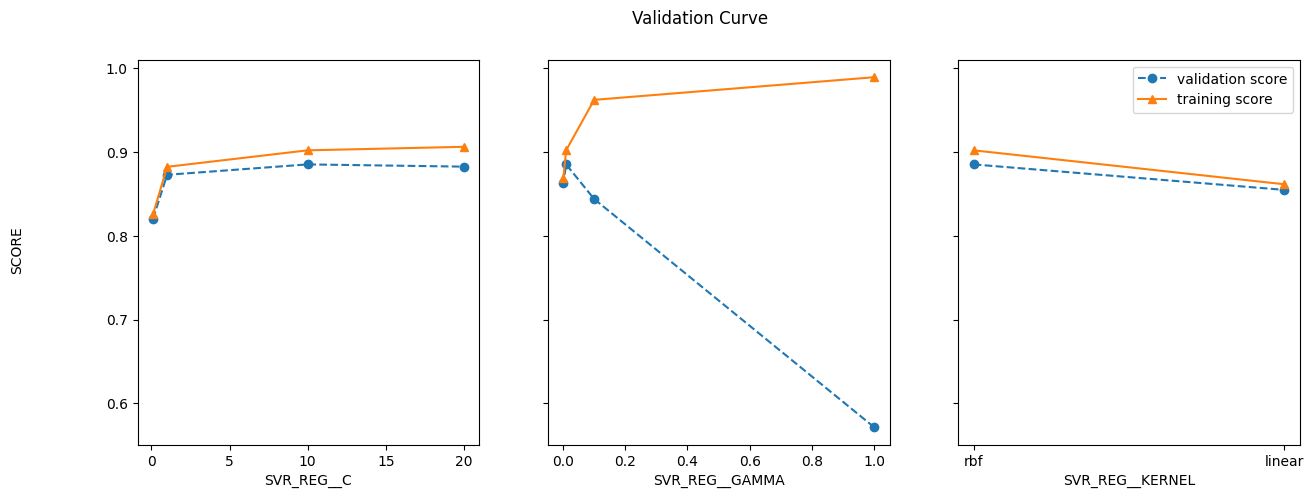

In [ ]:
# 튜닝결과 그래프

results = svr_gs.cv_results_
means_test = results['mean_test_score']
means_train = results['mean_train_score']

masks = []
masks_names = list(svr_gs.best_params_.keys())
for p_k, p_v in svr_gs.best_params_.items():
    masks.append(list(results['param_'+p_k].data==p_v))

params = svr_gs.param_grid

fig, ax = plt.subplots(1,len(params),
                       sharex='none',
                       sharey='all',
                       figsize=(15,5))
fig.suptitle('Validation Curve')
fig.text(0.04, 0.5, 'SCORE', va='center', rotation='vertical')
pram_preformace_in_best = {}

for i, p in enumerate(masks_names):
    m = np.stack(masks[:i] + masks[i+1:])
    pram_preformace_in_best
    best_parms_mask = m.all(axis=0)
    best_index = np.where(best_parms_mask)[0]
    x = np.array(params[p])
    y_1 = np.array(means_test[best_index])
    y_2 = np.array(means_train[best_index])
    ax[i].errorbar(x, y_1, linestyle='--', marker='o', label='validation score')
    ax[i].errorbar(x, y_2, linestyle='-', marker='^',label='training score' )
    ax[i].set_xlabel(p.upper())

plt.legend()
plt.show()

### 8.3 best 모델 설정

In [ ]:
# best 모델 파라미터 확인
print(svr_gs.best_score_)
print(svr_gs.best_params_)

0.8851348701353048
{'svr_reg__C': 10, 'svr_reg__gamma': 0.01, 'svr_reg__kernel': 'rbf'}


In [ ]:
# best 모델 파라미터를 최종모델로 훈련
best_reg = svr_gs.best_estimator_
best_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['연면적', '품질', '상태', '건축년도',
                                                   '리모델링년도', '지하면적', '차고면적',
                                                   '면적_1층', '면적_2층']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['주거유형', '판매유형', '판매조건'])])),
                ('svr_reg', SVR(C=10, gamma=0.01))])

In [ ]:
print(best_reg['svr_reg'])

SVR(C=10, gamma=0.01)


### 8.4 중요변수확인

In [ ]:
# 중요도 점수 계산
# kernel에서 linear만 계수 추출됨. rbf는 중요도 점수 출력 안됨

In [ ]:
# 그래프 그리기

## 9.모델 test 및 검정

### 9.1 검증용 데이터로 예측
- predict (class로 표시)
- predict_proba (확률값으로 표시): 분류모델에서 사용

In [ ]:
y_pred = best_reg.predict(X_test) # svr_reg -> svr_pipe
y_pred

array([ 1.19306051e+00, -9.74457865e-01, -1.44072421e+00,  6.38446980e-01,
        1.46052145e-01,  7.03362537e-01, -2.91811255e-01, -9.54828901e-01,
       -4.91454430e-01, -4.42185630e-01, -2.71870022e-02, -4.42185630e-01,
       -6.83858468e-01,  7.35795428e-02, -3.59522617e-01, -3.80224622e-01,
       -1.48603050e-01, -9.21429841e-01, -3.58798495e-01,  2.82890102e-01,
       -6.65052916e-01,  2.71807439e-01, -4.42185630e-01,  1.28796514e+00,
        1.36934367e+00,  1.23043907e+00,  2.48360694e-04, -7.38577339e-01,
        6.81756091e-01, -1.41961443e+00, -1.58728126e+00, -7.14852987e-01,
       -5.32547102e-01,  8.67880667e-01,  1.77595546e+00,  9.57519164e-01,
        2.18119406e+00,  4.44212702e-01,  8.61384473e-01,  1.09115404e+00,
       -3.69930682e-01,  4.91009933e-02,  8.80891373e-01, -5.03281291e-01,
        1.90658989e+00, -1.51208032e+00, -7.39574071e-01, -1.02117456e+00,
        8.13883100e-01, -4.85123867e-02,  8.54455491e-01, -7.59906199e-01,
        1.32875844e-01,  

### 9.2 실제값과 예측값 확인

In [ ]:
output = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
output

,Actual,Predicted
0,1.411804,1.193061
1,-1.023570,-0.974458
2,-1.705369,-1.440724
3,1.487601,0.638447
4,0.316530,0.146052
...,...,...
349,1.203361,0.950917
350,1.960938,1.388908
351,0.578031,0.296836
352,1.080190,1.286886


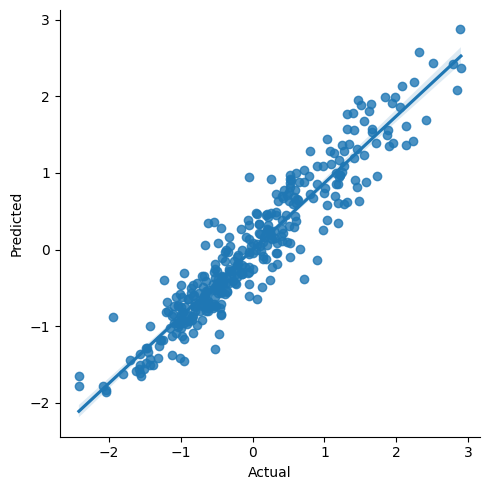

In [ ]:
sns.lmplot(x ='Actual', y ='Predicted', data = output)

### 9.3 모델 검정

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
print('MSE: %.3f' % mean_squared_error(y_test,y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test,y_pred))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2: %.3f' % r2_score(y_test,y_pred))

MSE: 0.108
MAE: 0.244
RMSE: 0.329
R2: 0.893
